In [1]:
DIR='/Users/ravali/Desktop'
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
df1 = pd.read_csv(DIR+'/sp1.csv', delimiter=',')
print (df1)
print(df1.head())
print(df1.dtypes) 


        Dataline            Play  PlayerLinenumber ActSceneLine  \
0              1        Henry IV               NaN          NaN   
1              2        Henry IV               NaN          NaN   
2              3        Henry IV               NaN          NaN   
3              4        Henry IV               1.0        1.1.1   
4              5        Henry IV               1.0        1.1.2   
5              6        Henry IV               1.0        1.1.3   
6              7        Henry IV               1.0        1.1.4   
7              8        Henry IV               1.0        1.1.5   
8              9        Henry IV               1.0        1.1.6   
9             10        Henry IV               1.0        1.1.7   
10            11        Henry IV               1.0        1.1.8   
11            12        Henry IV               1.0        1.1.9   
12            13        Henry IV               1.0       1.1.10   
13            14        Henry IV               1.0       1.1.1

In [2]:
df1=df1.dropna(how='any')
obj_df = df1.select_dtypes(include=['object']).copy()
obj_df.head()
obj_df["Play"] = obj_df["Play"].astype('category')
obj_df["Play"] = obj_df["Play"].cat.codes
obj_df["ActSceneLine"] = obj_df["ActSceneLine"].astype('category')
obj_df["ActSceneLine"] = obj_df["ActSceneLine"].cat.codes
obj_df["Player"] = obj_df["Player"].astype('category')
obj_df["Player"] = obj_df["Player"].cat.codes
obj_df["PlayerLine"] = obj_df["PlayerLine"].astype('category')
obj_df["PlayerLine"] = obj_df["PlayerLine"].cat.codes
print(obj_df.head())


   Play  ActSceneLine  Player  PlayerLine
3     9           324     457       60240
4     9           435     457       23568
5     9           546     457        4998
6     9           657     457       73793
7     9           768     457       48893


In [3]:
df1 = pd.concat([df1, obj_df], axis=1)
df1=df1.drop('Play',1)
df1=df1.drop('ActSceneLine',1)
df1=df1.drop('PlayerLine',1)
df1=df1.drop('Player',1)
df1 = pd.concat([df1, obj_df], axis=1)
print(df1['Play'])


3         9
4         9
5         9
6         9
7         9
8         9
9         9
10        9
11        9
12        9
13        9
14        9
15        9
16        9
17        9
18        9
19        9
20        9
21        9
22        9
23        9
24        9
25        9
26        9
27        9
28        9
29        9
30        9
31        9
32        9
         ..
111365    2
111366    2
111367    2
111368    2
111369    2
111370    2
111371    2
111372    2
111373    2
111374    2
111375    2
111376    2
111377    2
111378    2
111379    2
111380    2
111381    2
111382    2
111383    2
111384    2
111385    2
111386    2
111387    2
111388    2
111389    2
111390    2
111391    2
111392    2
111393    2
111394    2
Name: Play, Length: 105152, dtype: int8


In [4]:
Y=df1.Player #output label
X=df1.drop('Player',axis=1)#set without outputlabel testset
print(X)
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)
print ("\nX_train:\n")
print(X_train.head())
print (X_train.shape)
print ("\nX_test:\n")
print(X_test.head())
print (X_test.shape)


        Dataline  PlayerLinenumber  Play  ActSceneLine  PlayerLine
3              4               1.0     9           324       60240
4              5               1.0     9           435       23568
5              6               1.0     9           546        4998
6              7               1.0     9           657       73793
7              8               1.0     9           768       48893
8              9               1.0     9           781       58066
9             10               1.0     9           792       49761
10            11               1.0     9           803       49645
11            12               1.0     9           814       52908
12            13               1.0     9           325       83752
13            14               1.0     9           336        3521
14            15               1.0     9           347       20933
15            16               1.0     9           358        5816
16            17               1.0     9           369       5

In [ ]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
redictions = logisticRegr.predict(X_test)
print(score = logisticRegr.score(X_test, y_test))


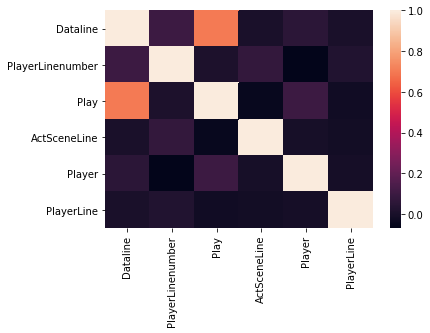

In [6]:
import seaborn as sns
corr = df1.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns.values,
        yticklabels=corr.columns.values)

In [7]:
corr.style.background_gradient()

,Dataline,PlayerLinenumber,Play,ActSceneLine,Player,PlayerLine
Dataline,1,0.100605,0.703329,0.00490068,0.0538467,0.00576794
PlayerLinenumber,0.100605,1,0.0117811,0.077232,-0.0675977,0.0258068
Play,0.703329,0.0117811,1,-0.0434896,0.101288,-0.0185619
ActSceneLine,0.00490068,0.077232,-0.0434896,1,-0.00129441,-0.0170661
Player,0.0538467,-0.0675977,0.101288,-0.00129441,1,-0.00847836
PlayerLine,0.00576794,0.0258068,-0.0185619,-0.0170661,-0.00847836,1
